#MaliciousUrls

###Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tabulate import tabulate
import matplotlib.pyplot as plt
import os


## Load Dataset

> ##### Read the csv

In [ ]:
data = pd.read_csv('malicious_phish.csv')

> ##### Print the first five rows

In [ ]:
data.head()

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


> ##### Print info

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651191 entries, 0 to 651190
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   url     651191 non-null  object
 1   type    651191 non-null  object
dtypes: object(2)
memory usage: 9.9+ MB


> ##### Print 10 random rows

In [ ]:
data.sample(10)

,url,type
108826,content.usatoday.com/community/tags/topic.aspx...,benign
167186,3dsvc.com.br,phishing
327007,http://toyotagujranwala.com/index.php?option=c...,defacement
257659,http://www.techlimits.com/contactos,defacement
148575,http://udn.com/news/story/8141/901280-TPA%E6%9...,benign
482266,wn.com/Georgi_Kaloyanchev,benign
432579,http://olx.co.id/i2/hobi-olahraga/buku-majalah...,benign
608298,www.howstuffworks.com/catering.htm,phishing
292343,1001.yippie.biz/ca/cypress/,benign
22465,youtube.com/watch?v=ZwVYL63RA9Y,benign


> ##### Print number of colums and rows

In [ ]:
data.shape

(651191, 2)

Print the dataset's description

In [ ]:
data.describe()

,url,type
count,651191,651191
unique,641119,4
top,http://style.org.hc360.com/css/detail/mysite/s...,benign
freq,180,428103


## Cleaning the Dataset

> #### Delete the duplicates and NA values




In [ ]:
data = data.drop_duplicates()

> #### Delete the rows with NA values

In [ ]:
data = data.dropna()

> #### Print the data shape

In [ ]:
data.shape

(641125, 2)

> #### Print the data describe

In [ ]:
data.describe()

,url,type
count,641125,641125
unique,641119,4
top,en.wikipedia.org/wiki/Desktop_publishing,benign
freq,2,428080


## Data discovery


> #### Class distribution

In [ ]:
def perc(values):
    pct = float(values / data['type'].count()) * 100
    return round(pct, 2)

# Group by type
print("Group by type: ")
grouped_data = data.groupby('type').size()
print(grouped_data)
print("--------------------\n\n")

d_benign = grouped_data['benign']
d_phishing = grouped_data['phishing']
d_defacement = grouped_data['defacement']
d_malware = grouped_data['malware']

# Print the percentual of each type
print("Percentual of each type: ")
print('Benign:', d_benign, '%', perc(d_benign))
print('Phishing:', d_phishing, '%', perc(d_phishing))
print('Defacement:', d_defacement, '%', perc(d_defacement))
print('Malware:', d_malware, '%', perc(d_malware))

Group by type: 
type
benign        428080
defacement     95308
malware        23645
phishing       94092
dtype: int64
--------------------


Percentual of each type: 
Benign: 428080 % 66.77
Phishing: 94092 % 14.68
Defacement: 95308 % 14.87
Malware: 23645 % 3.69


> #### Bar plot

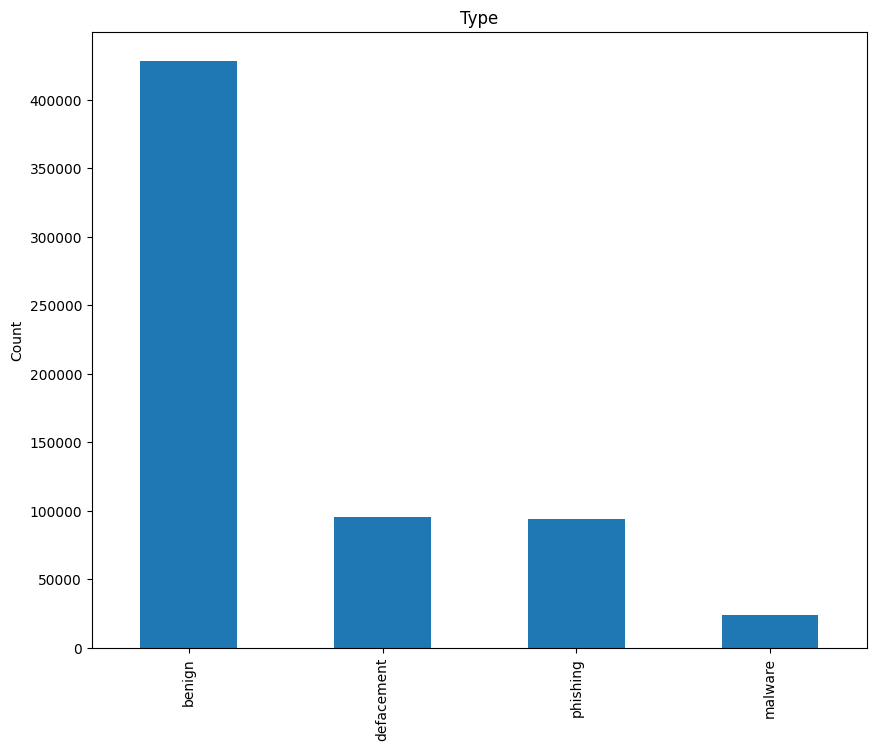

In [ ]:
p_bar = data['type'].value_counts().plot(kind='bar', title='Type', figsize=(10,8));
p_bar.set_ylabel('Count');

> #### Pie chart

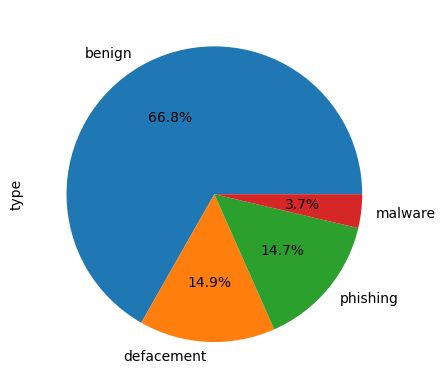

In [ ]:
data['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

## Preparing training and test set

> #### Batch size

In [ ]:
batch_size = 10000
total_raws = len(data)

> #### Choosing models

In [ ]:
models = [
    MultinomialNB(),
    GaussianNB(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
]

> #### Model training

MODELLO: MultinomialNB
Elaborazione n 1 completata per il batch 1-10000 su 641125 righe.
MODELLO: MultinomialNB
Elaborazione n 2 completata per il batch 10001-20000 su 641125 righe.
MODELLO: MultinomialNB
Elaborazione n 3 completata per il batch 20001-30000 su 641125 righe.
MODELLO: MultinomialNB
Elaborazione n 4 completata per il batch 30001-40000 su 641125 righe.
MODELLO: MultinomialNB
Elaborazione n 5 completata per il batch 40001-50000 su 641125 righe.
MODELLO: MultinomialNB
Elaborazione n 6 completata per il batch 50001-60000 su 641125 righe.
MODELLO: MultinomialNB
Elaborazione n 7 completata per il batch 60001-70000 su 641125 righe.
MODELLO: MultinomialNB
Elaborazione n 8 completata per il batch 70001-80000 su 641125 righe.
MODELLO: MultinomialNB
Elaborazione n 9 completata per il batch 80001-90000 su 641125 righe.
MODELLO: MultinomialNB
Elaborazione n 10 completata per il batch 90001-100000 su 641125 righe.
MODELLO: MultinomialNB
Elaborazione n 11 completata per il batch 100001-

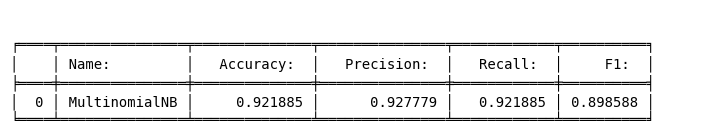

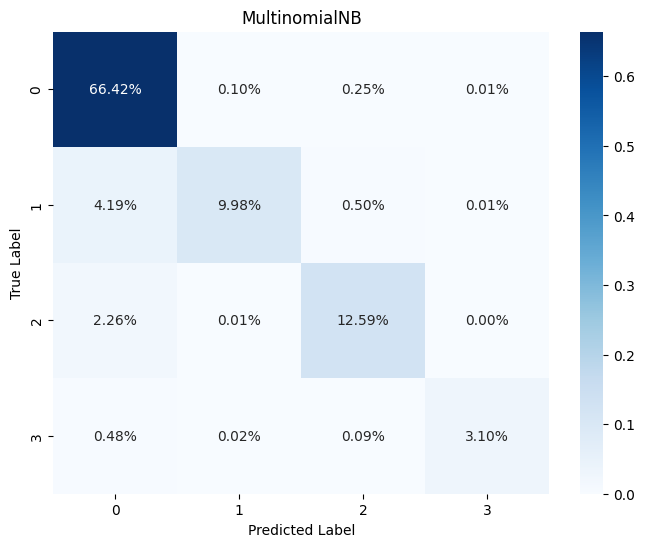

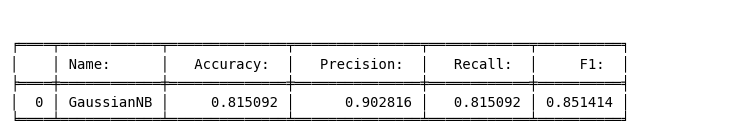

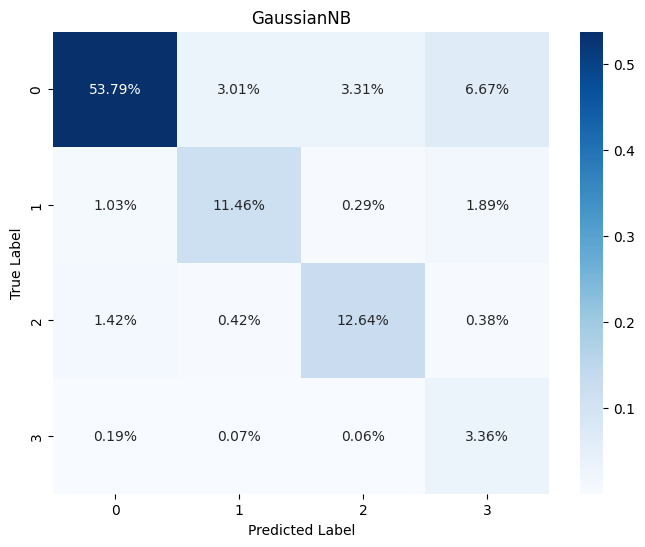

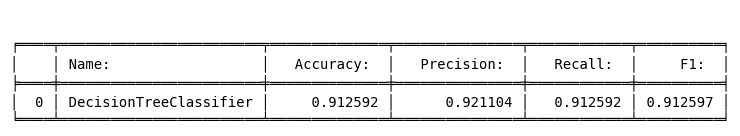

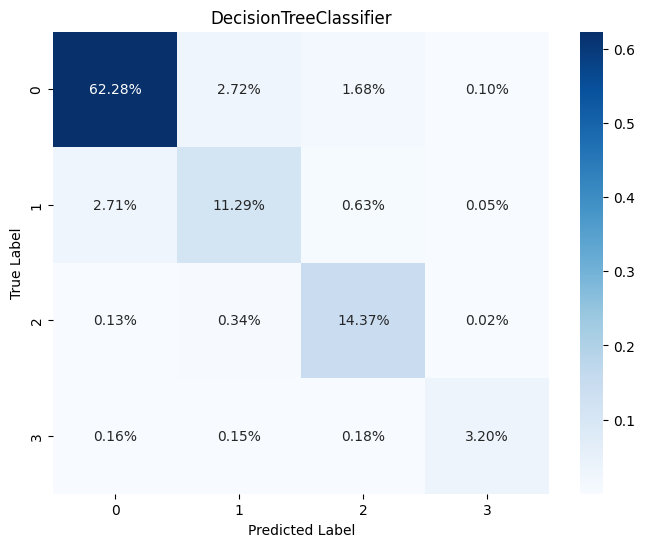

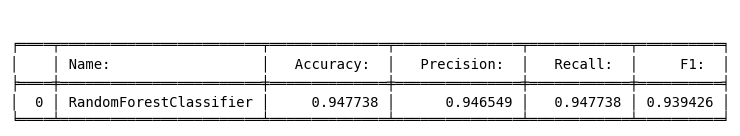

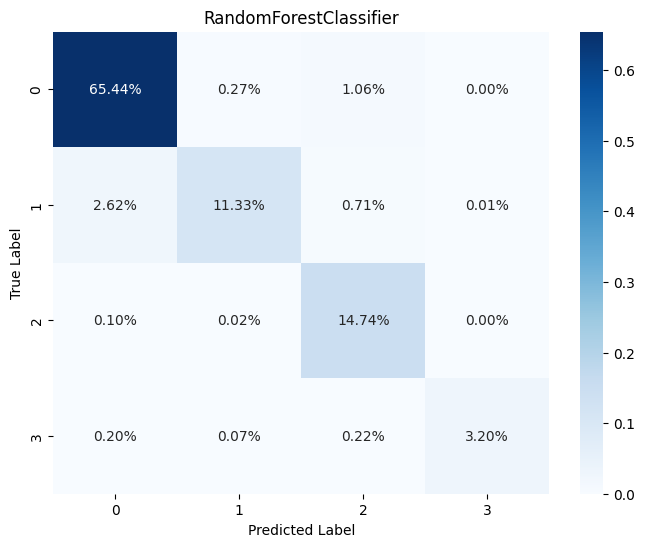

In [ ]:
results = []

for model in models:
    total_accuracy = 0
    total_precision = 0
    total_recall = 0
    total_f1 = 0
    total_predictions = []
    total_labels = []
    i = 0

    for start in range(0, total_raws, batch_size):
        i += 1
        end = min(start + batch_size, total_raws)

        # Seleziona il batch corrente
        batch_data = data[start:end]

        # Preparazione delle caratteristiche e delle etichette
        x = batch_data['url']
        y = batch_data['type']

        # Conversione delle etichette in formato numerico
        label_mapping = {'benign': 1, 'phishing': 2, 'defacement': 3, 'malware': 4}
        y = y.map(label_mapping)

        # Divisione dei dati in dati di addestramento e dati di test
        train_feature, test_feature, train_labels, test_labels = train_test_split(x, y, test_size=0.2, stratify=y,
                                                                                  random_state=42)

        # Creazione di una rappresentazione numerica utilizzando TF-IDF
        tfidf = TfidfVectorizer()
        train_vectors = tfidf.fit_transform(train_feature).toarray()
        test_vectors = tfidf.transform(test_feature).toarray()

        # Trasformazione delle etichette in array 1D
        train_labels = train_labels.values.reshape(-1)
        test_labels = test_labels.values.reshape(-1)

        # Addestramento del modello
        print("MODELLO: " + model.__class__.__name__)
        model.fit(train_vectors, train_labels)
        predictions = model.predict(test_vectors)
        total_predictions.extend(predictions)
        total_labels.extend(test_labels)

        accuracy = accuracy_score(test_labels, predictions)
        precision = precision_score(test_labels, predictions, average='weighted', zero_division=1)
        recall = recall_score(test_labels, predictions, average='weighted')
        f1 = f1_score(test_labels, predictions, average='weighted')

        # Aggiorna le metriche totali
        total_accuracy += accuracy
        total_precision += precision
        total_recall += recall
        total_f1 += f1

        print(f"Elaborazione n {i} completata per il batch {start + 1}-{end} su {total_raws} righe.")

    num_models = i
    print("Numero di modelli: ", num_models)

    avarage_accuracy = total_accuracy / num_models
    avarage_precision = total_precision / num_models
    avarage_recall = total_recall / num_models
    avarage_f1 = total_f1 / num_models

    # Creazione tabella
    results.append({'Model': model.__class__.__name__,
                  'Accuracy': avarage_accuracy,
                  'Precision': avarage_precision,
                  'Recall': avarage_recall,
                  'F1': avarage_f1})

    df = pd.DataFrame({'Name: ': [model.__class__.__name__],
                    'Accuracy: ': [avarage_accuracy],
                    'Precision: ': [avarage_precision],
                    'Recall: ': [avarage_recall],
                    'F1: ': [avarage_f1]})

    # Creazione della tabella utilizzando Tabulate
    table = tabulate(df, headers='keys', tablefmt='fancy_grid')

    # Configurazione del grafico 8 larghezza x 2 altezza
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.axis('off')

    # Aggiunta della tabella come testo all'asse
    ax.text(0, 0, table, fontsize=10, family='monospace')

    # Centrare l'immagine nel grafico
    fig.tight_layout(pad=3)


    # Creazione matrice di confusione
    confusion = confusion_matrix(total_labels, total_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion / np.sum(confusion), annot=True, fmt='0.2%', cmap='Blues')
    plt.title(model.__class__.__name__)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')



## Results

> #### Accuracy

Text(0.5, 1.0, 'Accuracy of Different Models')

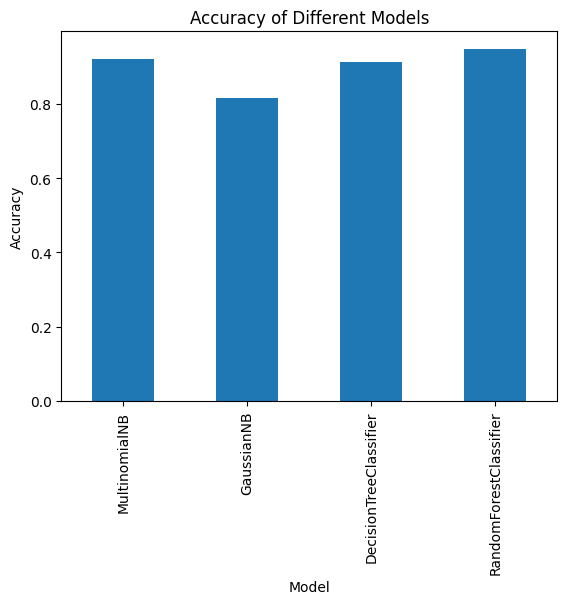

In [ ]:
table_results = pd.DataFrame(results)
table_results.head()


table_results.plot.bar(x='Model', y='Accuracy', legend=False)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
#plt.xticks(rotation=45)

> #### Precision

Text(0.5, 1.0, 'Precision of Different Models')

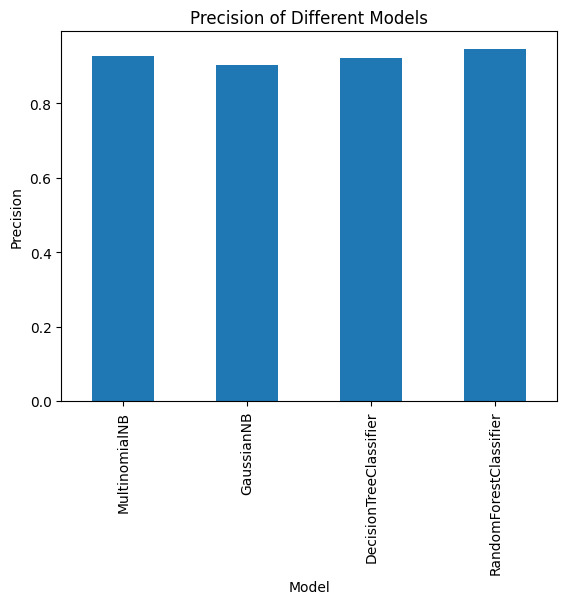

In [ ]:
table_results.plot.bar(x='Model', y='Precision', legend=False)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision of Different Models')
#plt.xticks(rotation=45)

> #### Recall

Text(0.5, 1.0, 'Recall of Different Models')

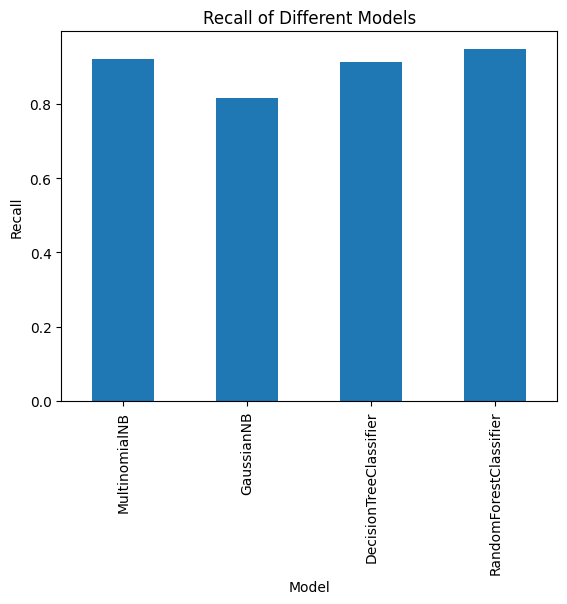

In [ ]:
table_results.plot.bar(x='Model', y='Recall', legend=False)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall of Different Models')
#plt.xticks(rotation=45)

> #### F1

Text(0.5, 1.0, 'F1 of Different Models')

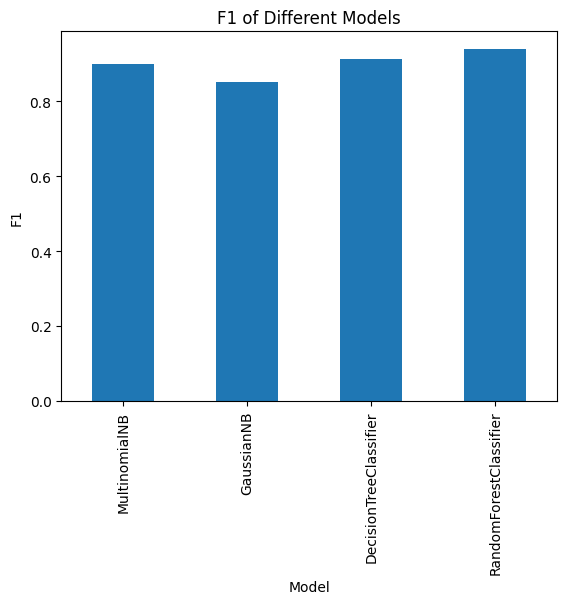

In [ ]:
table_results.plot.bar(x='Model', y='F1', legend=False)
plt.xlabel('Model')
plt.ylabel('F1')
plt.title('F1 of Different Models')
#plt.xticks(rotation=45)

> #### Accuracy, precision, recall, F1 of different models

Text(0.5, 1.0, 'Accuracy, Precision, Recall, F1 of Different Models')

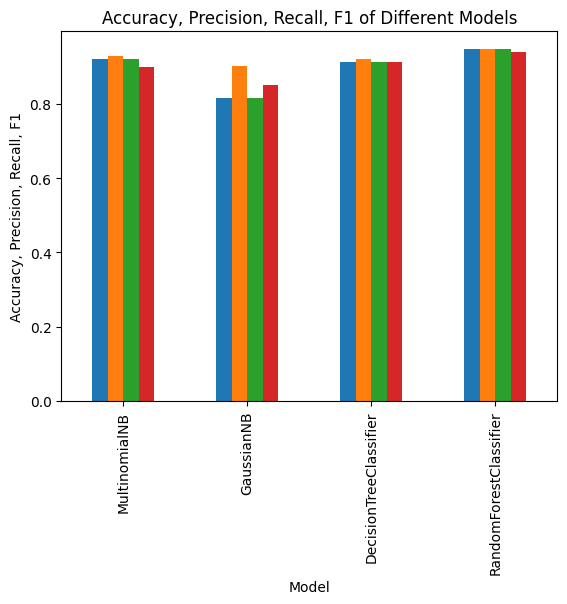

In [ ]:
table_results.plot.bar(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1'], legend=False)
plt.xlabel('Model')
plt.ylabel('Accuracy, Precision, Recall, F1')
plt.title('Accuracy, Precision, Recall, F1 of Different Models')
#plt.xticks(rotation=45)